<a href="https://colab.research.google.com/github/hbeck118/GIS/blob/main/Germany.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Counties Germany Map

In [78]:
!pip install geopandas==1.0.1

In [79]:
import os, zipfile #basics
import pandas as pd #data management
import matplotlib.pyplot as plt #vis

import geopandas as gpd #gis/maps

#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files #to download from colab onto hd

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

In [80]:
#!python --version
gpd.__version__

'1.0.1'

In [81]:
!pip install mapclassify
import mapclassify #need for thematic map classification

In [82]:
#Shapefile of counties from https://data.opendatasoft.com/explore/dataset/georef-germany-kreis%40public/export/?disjunctive.lan_code&disjunctive.lan_name&disjunctive.krs_code&disjunctive.krs_name&disjunctive.krs_name_short
! wget -q -O germany_counties.zip https://docs.google.com/uc?id=12_vFQomIzk5D9VpAgsf8aeBpl5ONXfij&export=download

zip_ref = zipfile.ZipFile('germany_counties.zip', 'r'); zip_ref.extractall(); zip_ref.close()
ger0=gpd.read_file('georef-germany-kreis-millesime.shp')

<Axes: >

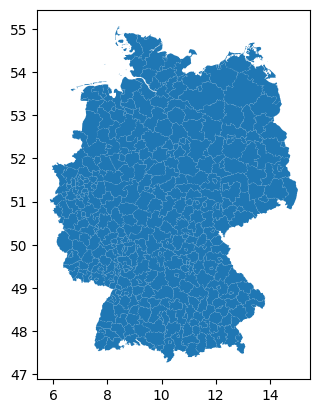

In [83]:
ger0.plot()

In [84]:
#importing data on foreign born population in Germany from https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/
gerfb=pd.read_excel('https://docs.google.com/uc?id=1V6ZoC0HvmVnGKbnXj98IE3QvCKNKNFfg&export=download')

In [85]:
gerfb.head(10)

,Statistik_Code,Statistik_Label,Stichtag,Region,AGS_Kreis,Geschlecht_Insgesamt_Anzahl,Geschlecht_Maennlich_Anzahl,Geschlecht_Weiblich_Anzahl,Staatsangehoerigkeit_EU-Staaten_Anzahl,Staatsangehoerigkeit_EU-Drittstaaten_Anzahl,Alter_unter_6_Anzahl,Alter_6_und_mehr_Anzahl,Alter_unter_18_Anzahl,Alter_18_und_mehr_Anzahl,Alter_unter_15_Anzahl,Alter_15_bis_unter_65_Anzahl,Alter_65_und_mehr_Anzahl
0,12521,Auslaenderstatistik,31.12.2023,Deutschland ...,Kein_AGS ...,13895865,7305525,6590340,5113875,8781990,748770,13147095,2360060,11535805,1971880,10668475,1255510
1,12521,Auslaenderstatistik,31.12.2023,Schleswig-Holstein ...,Kein_AGS ...,346690,181990,164700,107365,239325,22015,324675,70625,276065,58630,259355,28705
2,12521,Auslaenderstatistik,31.12.2023,Flensburg_Stadt ...,01001 ...,19020,10310,8710,8005,11015,1335,17685,3800,15225,3120,14530,1370
3,12521,Auslaenderstatistik,31.12.2023,Kiel_Stadt ...,01002 ...,36755,18990,17770,7715,29040,2420,34340,7295,29460,6090,27605,3060
4,12521,Auslaenderstatistik,31.12.2023,Luebeck_Stadt ...,01003 ...,31770,16370,15400,9160,22610,1715,30060,5530,26240,4600,23910,3265
5,12521,Auslaenderstatistik,31.12.2023,Neumuenster_Stadt ...,01004 ...,14760,8005,6750,4955,9805,1010,13750,3230,11530,2685,11085,990
6,12521,Auslaenderstatistik,31.12.2023,Dithmarschen ...,01051 ...,12520,6735,5785,4430,8090,985,11535,3100,9420,2585,9240,700
7,12521,Auslaenderstatistik,31.12.2023,Herzogtum_Lauenburg ...,01053 ...,22710,11820,10890,7100,15610,1485,21225,5025,17685,4150,16770,1790
8,12521,Auslaenderstatistik,31.12.2023,Nordfriesland ...,01054 ...,17795,9265,8530,6765,11025,1200,16595,3685,14110,3085,13450,1255
9,12521,Auslaenderstatistik,31.12.2023,Ostholstein ...,01055 ...,17445,9035,8410,5600,11845,1015,16430,3495,13950,2850,13190,1400


In [86]:
gerfb.dtypes

,0
Statistik_Code,int64
Statistik_Label,object
Stichtag,object
Region,object
AGS_Kreis,object
Geschlecht_Insgesamt_Anzahl,int64
Geschlecht_Maennlich_Anzahl,int64
Geschlecht_Weiblich_Anzahl,int64
Staatsangehoerigkeit_EU-Staaten_Anzahl,int64
Staatsangehoerigkeit_EU-Drittstaaten_Anzahl,int64


In [87]:
gerfb1=gerfb[['Region', 'AGS_Kreis', 'Geschlecht_Insgesamt_Anzahl']]

In [88]:
gerfb1.head(5)

,Region,AGS_Kreis,Geschlecht_Insgesamt_Anzahl
0,Deutschland ...,Kein_AGS ...,13895865
1,Schleswig-Holstein ...,Kein_AGS ...,346690
2,Flensburg_Stadt ...,01001 ...,19020
3,Kiel_Stadt ...,01002 ...,36755
4,Luebeck_Stadt ...,01003 ...,31770


In [89]:
gerfb2 = gerfb1.rename(columns={'AGS_Kreis': 'county_code'})

In [90]:
gerfb2.columns

Index(['Region', 'county_code', 'Geschlecht_Insgesamt_Anzahl'], dtype='object')

In [91]:
gerfb2.dtypes

,0
Region,object
county_code,object
Geschlecht_Insgesamt_Anzahl,int64


In [92]:
ger0.columns

Index(['year', 'lan_code', 'lan_name', 'krs_code', 'krs_name', 'krs_area_co',
       'krs_type', 'krs_name_sh', 'geometry'],
      dtype='object')

In [93]:
ger0['krs_code']

,krs_code
0,['03157']
1,['05316']
2,['05954']
3,['05962']
4,['07131']
...,...
395,['09772']
396,['13073']
397,['14524']
398,['14626']


In [94]:
#trying to remove square brackets and quotation marks from county codes
#code from https://stackoverflow.com/questions/38147447/how-to-remove-square-bracket-from-pandas-dataframe
ger0['krs_code'] = ger0['krs_code'].str.strip('[]')
ger0['county_code'] = ger0['krs_code'].str.replace("'", "")

In [95]:
ger0['county_code']

,county_code
0,03157
1,05316
2,05954
3,05962
4,07131
...,...
395,09772
396,13073
397,14524
398,14626


In [96]:
#making the county_code column in both data sets floats
ger0['county_code2'] = ger0['county_code'].astype(float)
gerfb2['county_code2'] = pd.to_numeric(gerfb2['county_code'], errors='coerce')

In [97]:
ger0.columns

Index(['year', 'lan_code', 'lan_name', 'krs_code', 'krs_name', 'krs_area_co',
       'krs_type', 'krs_name_sh', 'geometry', 'county_code', 'county_code2'],
      dtype='object')

In [98]:
gerfb2.columns

Index(['Region', 'county_code', 'Geschlecht_Insgesamt_Anzahl', 'county_code2'], dtype='object')

In [100]:
gerfb3 = pd.merge(ger0, gerfb2, on='county_code2',how='outer',indicator=True)
gerfb3[['Region','county_code2','_merge']]

gerfb_final = pd.merge(ger0, gerfb2, on='county_code2',how='inner',indicator=False)

,Region,county_code2,_merge
0,Peine ...,3157.0,both
1,Leverkusen_Stadt ...,5316.0,both
2,Ennepe-Ruhr-Kreis ...,5954.0,both
3,Maerkischer_Kreis ...,5962.0,both
4,Ahrweiler ...,7131.0,both
...,...,...,...
441,Direktionsbezirk_Chemnitz_(frueher) ...,NaN,right_only
442,Direktionsbezirk_Dresden_(frueher) ...,NaN,right_only
443,Direktionsbezirk_Leipzig_(frueher) ...,NaN,right_only
444,Sachsen-Anhalt ...,NaN,right_only


<Axes: >

[]

[]

Text(0.5, 151.00200738603556, 'https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/')

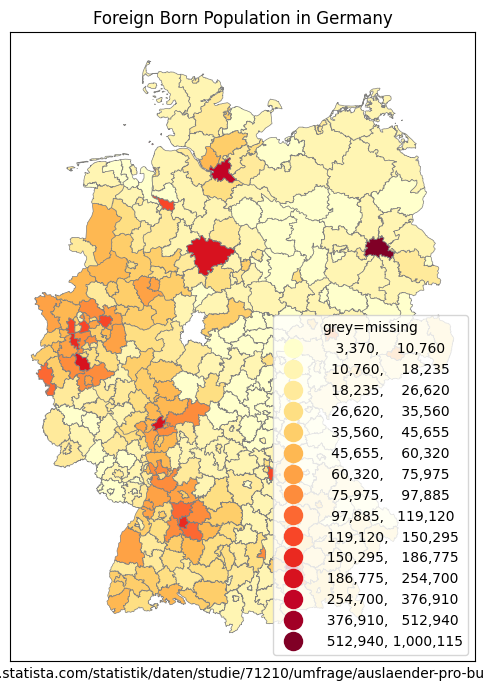

In [133]:
fig, ax = plt.subplots(1, figsize=(6,10))
gerfb_final.plot(ax=ax,column='Geschlecht_Insgesamt_Anzahl',legend=True,cmap='YlOrRd',
          scheme='natural_breaks',k=15, edgecolor='grey',linewidth=0.5,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right', 'markerscale':1.4})
leg1 = ax.get_legend()
leg1.set_title('''grey=missing''')

ax.title.set_text("Foreign Born Population in Germany")
ax.set_xticks([]) #kills xticks
ax.set_yticks([]) #kills xticks
ax.set_xlabel('''https://de.statista.com/statistik/daten/studie/71210/umfrage/auslaender-pro-bundesland/''')